In [1]:
import pyagrum as gum
import pyagrum.lib.image as gimg

In [2]:
def addTicTacToe(origine,player="x"):
    global coups
    global g
    
    id_o=coups["".join(origine)]
    
    for i in range(len(origine)):
        if origine[i]=='.':
            origine[i]=player
            if "".join(origine) in coups:
                g.addEdge(id_o,coups["".join(origine)])
            else:
                coups["".join(origine)]=g.addNode()
                g.addEdge(id_o,coups["".join(origine)])
                addTicTacToe(origine,"o" if player=="x" else "x")
            origine[i]="."


In [3]:
from timeit import default_timer as timer

start = timer()

g=gum.UndiGraph()
coups={}
origine= ['.']*7
coups["".join(origine)]=g.addNodeWithId()
addTicTacToe(origine)

end = timer()
print("Size : {0}\nEdges : {1}\nTime : {2}s".format(g.size(),g.sizeEdges(),end - start))

Size : 750
Edges : 1869
Time : 0.01577955699758604s


Time : 5.59310777898645s


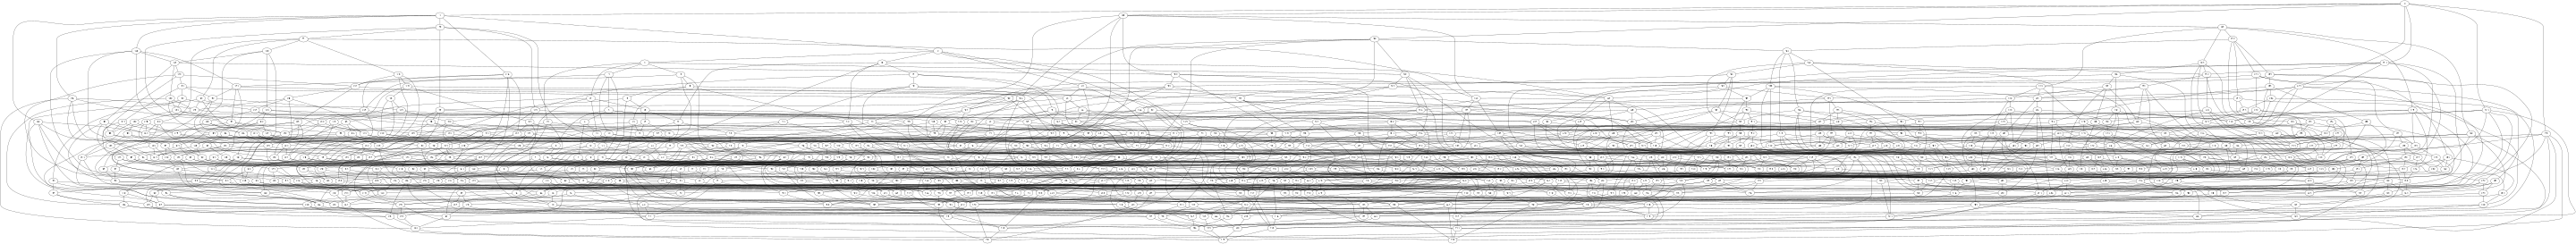

In [4]:
import pydot as dot
from IPython.display import Image

start = timer()

gr=dot.graphviz.graph_from_dot_data(g.toDot())
gr.set("size","30")
png=gr.create_png()
end = timer()
print("Time : {0}s".format(end - start))

Image(png)